# Speech Processing

Date: 2023/09/01

This notebook is a copy of [this site](https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html) with some modifications.

I read the article in September 2018. I relearn it after five years.

In [89]:
import numpy as np
import scipy.io.wavfile
from scipy.fft import dct, rfft, rfftfreq
import matplotlib.pyplot as plt
%matplotlib inline

## Signal

In [ ]:
fs, signal = scipy.io.wavfile.read('OSR_us_000_0010_8k.wav')  # File assumed to be in the same directory
signal = signal[0:int(3.5 * fs)]  # Keep the first 3.5 seconds

'Fs: {}Hz, signal_length: {}'.format(fs, len(signal))

In [3]:
time = np.linspace(0, 3.5, len(signal))

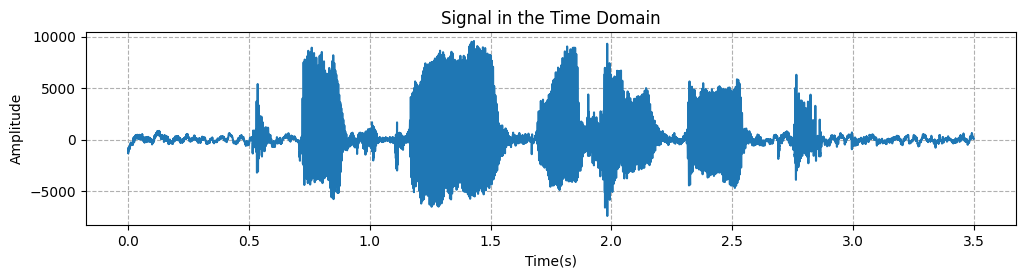

In [4]:
fig, ax = plt.subplots(figsize=(12, 2.5))
ax.set_title('Signal in the Time Domain')
ax.set_xlabel('Time(s)')
ax.set_ylabel('Amplitude')
ax.grid(ls='--')
ax.plot(time, signal)

## Pre-Emphasis

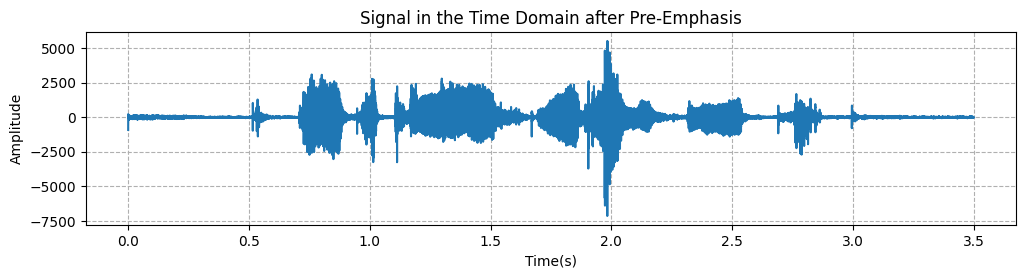

In [8]:
pre_emphasis = 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

fig, ax = plt.subplots(figsize=(12, 2.5))
ax.set_title('Signal in the Time Domain after Pre-Emphasis')
ax.set_xlabel('Time(s)')
ax.set_ylabel('Amplitude')
ax.grid(ls='--')
ax.plot(time, emphasized_signal)

## Framing

In [6]:
frame_size = 0.025
frame_stride = 0.010

In [10]:
frame_length, frame_step = frame_size * fs, frame_stride * fs  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))

'frame_length: {}, frame_step: {}'.format(frame_length, frame_step)

'frame_length: 200, frame_step: 80'

In [21]:
'''
[----------------------------- signal length -------------------------------]
[-------------------------------------------------------][-- frame length --]
[-- frame length --]
      [-- frame length --]
            [-- frame length --]
                  [-- frame length --]
                            :
[-80-][-80-][-80-][-80-][-80-][-80-][-80-][-80-][-80-][-80-]
frame_step
'''

num_frames = int(np.ceil((signal_length - frame_length) / frame_step))
'The number of frames: {}'.format(num_frames)

'The number of frames: 348'

In [20]:
'''
[----------------------------- signal length -------------------------------]
[-------------------------------------------------------][-- frame length --]
[-- frame length --]
      [-- frame length --]
            [-- frame length --]
                  [-- frame length --]
                                  :
                                                            [-- frame length --]
0     1     2     3     4     5     6     7     8     9    num_frames       pad
[-80-][-80-][-80-][-80-][-80-][-80-][-80-][-80-][-80-][-80-]                |--|
frame_step
[----------------------------- pad signal -------------------------------------]
'''

pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros(pad_signal_length - signal_length)
pad_signal = np.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal
'The number of zero-padded samples: {}'.format(pad_signal_length - signal_length)

'The number of zero-padded samples: 40'

In [22]:
np.arange(0, num_frames * frame_step, frame_step)

array([    0,    80,   160,   240,   320,   400,   480,   560,   640,
         720,   800,   880,   960,  1040,  1120,  1200,  1280,  1360,
        1440,  1520,  1600,  1680,  1760,  1840,  1920,  2000,  2080,
        2160,  2240,  2320,  2400,  2480,  2560,  2640,  2720,  2800,
        2880,  2960,  3040,  3120,  3200,  3280,  3360,  3440,  3520,
        3600,  3680,  3760,  3840,  3920,  4000,  4080,  4160,  4240,
        4320,  4400,  4480,  4560,  4640,  4720,  4800,  4880,  4960,
        5040,  5120,  5200,  5280,  5360,  5440,  5520,  5600,  5680,
        5760,  5840,  5920,  6000,  6080,  6160,  6240,  6320,  6400,
        6480,  6560,  6640,  6720,  6800,  6880,  6960,  7040,  7120,
        7200,  7280,  7360,  7440,  7520,  7600,  7680,  7760,  7840,
        7920,  8000,  8080,  8160,  8240,  8320,  8400,  8480,  8560,
        8640,  8720,  8800,  8880,  8960,  9040,  9120,  9200,  9280,
        9360,  9440,  9520,  9600,  9680,  9760,  9840,  9920, 10000,
       10080, 10160,

In [29]:
np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T

array([[    0,     0,     0, ...,     0,     0,     0],
       [   80,    80,    80, ...,    80,    80,    80],
       [  160,   160,   160, ...,   160,   160,   160],
       ...,
       [27600, 27600, 27600, ..., 27600, 27600, 27600],
       [27680, 27680, 27680, ..., 27680, 27680, 27680],
       [27760, 27760, 27760, ..., 27760, 27760, 27760]])

In [27]:
np.arange(0, frame_length), (num_frames, 1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [28]:
np.tile(np.arange(0, frame_length), (num_frames, 1))

array([[  0,   1,   2, ..., 197, 198, 199],
       [  0,   1,   2, ..., 197, 198, 199],
       [  0,   1,   2, ..., 197, 198, 199],
       ...,
       [  0,   1,   2, ..., 197, 198, 199],
       [  0,   1,   2, ..., 197, 198, 199],
       [  0,   1,   2, ..., 197, 198, 199]])

In [31]:
indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T

In [36]:
indices

array([[    0,     1,     2, ...,   197,   198,   199],
       [   80,    81,    82, ...,   277,   278,   279],
       [  160,   161,   162, ...,   357,   358,   359],
       ...,
       [27600, 27601, 27602, ..., 27797, 27798, 27799],
       [27680, 27681, 27682, ..., 27877, 27878, 27879],
       [27760, 27761, 27762, ..., 27957, 27958, 27959]])

In [34]:
'dtype: {}, shape: {}'.format(indices.dtype, indices.shape)

'dtype: int64, shape: (348, 200)'

In [60]:
frames = pad_signal[indices.astype(np.int32, copy=False)]
frames

array([[-9.1900e+02, -4.2257e+02,  2.2558e+02, ...,  4.9530e+01,
         1.0324e+02,  4.9510e+01],
       [-4.6220e+01,  1.8820e+01, -3.6160e+01, ...,  4.1050e+01,
        -2.4020e+01, -1.9070e+01],
       [ 1.5450e+01, -2.7830e+01, -2.3430e+01, ..., -2.4500e+00,
         8.7220e+01,  7.6590e+01],
       ...,
       [-2.4600e+00,  3.3450e+01,  2.5440e+01, ...,  2.8500e+00,
        -4.6700e+01, -3.5750e+01],
       [-2.4380e+01, -1.0340e+01, -2.8850e+01, ...,  4.9300e+01,
         1.8590e+01,  2.8920e+01],
       [-1.7540e+01, -5.0500e+00,  4.8300e+00, ...,  4.8000e-01,
         2.5120e+01, -1.3490e+01]])

## Window

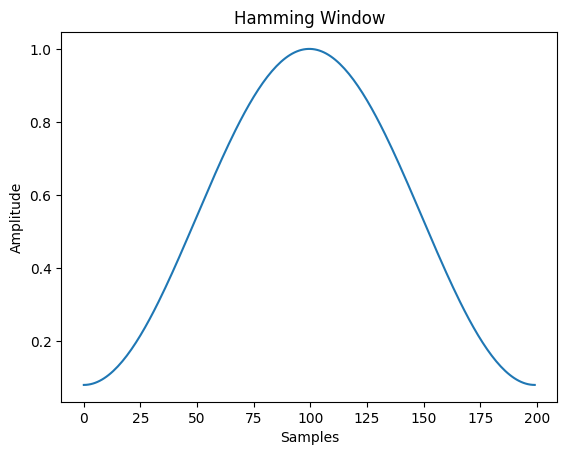

In [42]:
# Hamming window
n = np.arange(frame_length)
hamming = 0.54 - 0.46 * np.cos (2 * np.pi * n/ (frame_length - 1))

fig, ax = plt.subplots()
ax.set_title('Hamming Window')
ax.set_xlabel('Samples')
ax.set_ylabel('Amplitude')
ax.plot(hamming)

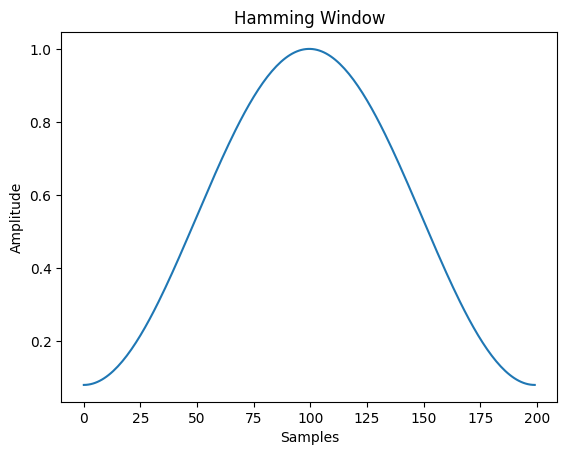

In [43]:
fig, ax = plt.subplots()
ax.set_title('Hamming Window')
ax.set_xlabel('Samples')
ax.set_ylabel('Amplitude')
ax.plot(np.hamming(frame_length))

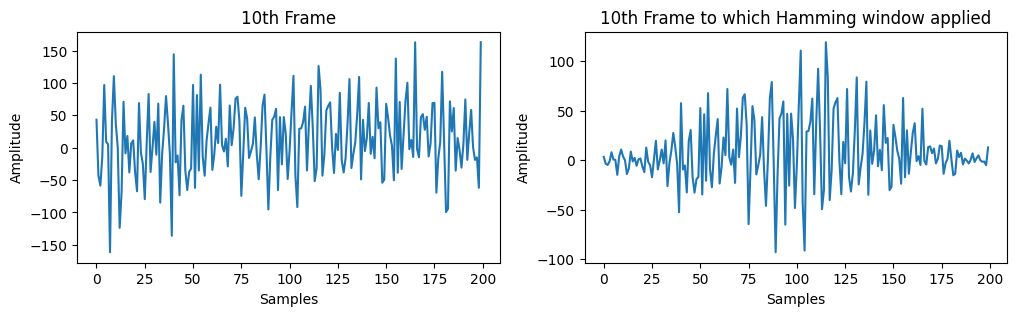

In [68]:
frames_applied = frames * np.hamming(frame_length)

fig,axes = plt.subplots(1, 2, figsize=(12,3))
ax0 = axes[0]
ax1 = axes[1]
ax0.set_title('10th Frame')
ax0.set_xlabel('Samples')
ax0.set_ylabel('Amplitude')
ax0.plot(frames[10])
ax1.set_title('10th Frame to which Hamming window applied')
ax1.set_xlabel('Samples')
ax1.set_ylabel('Amplitude')
ax1.plot(frames_applied[10])

In [78]:
NFFT = 512

In [79]:
mag_frames = np.absolute(rfft(frames_applied, NFFT))
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))
pow_frames.shape

(348, 257)

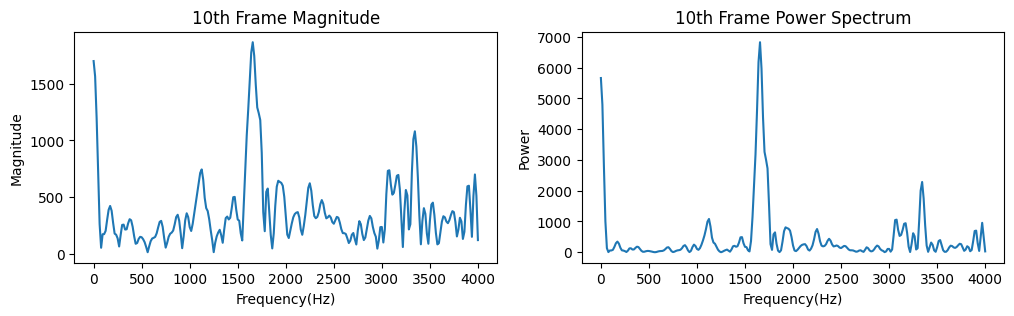

In [93]:
freq = rfftfreq(NFFT, d = 1/fs)

fig,axes = plt.subplots(1, 2, figsize=(12,3))
ax0 = axes[0]
ax1 = axes[1]
ax0.set_title('10th Frame Magnitude')
ax0.set_xlabel('Frequency(Hz)')
ax0.set_ylabel('Magnitude')
ax0.plot(freq, mag_frames[10])
ax1.set_title('10th Frame Power Spectrum')
ax1.set_xlabel('Frequency(Hz)')
ax1.set_ylabel('Power')
ax1.plot(freq, pow_frames[10])

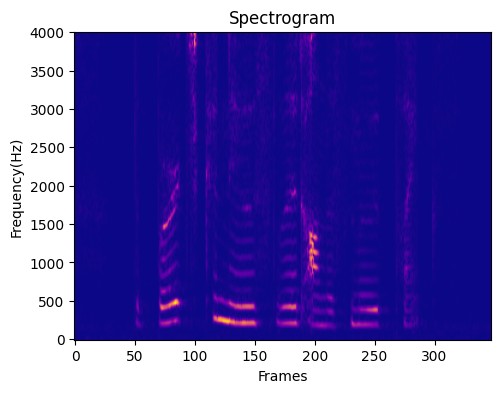

In [152]:
yticklabels = np.arange(0, 4001, 500).astype(int) 
yticks = np.linspace(0, NFFT/2, 9)

fig, ax = plt.subplots(figsize=(6,4))

ax.set_title('Spectrogram')
ax.set_xlabel('Frames')
ax.set_ylabel('Frequency(Hz)')
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.imshow(mag_frames.T, cmap='plasma')
ax.invert_yaxis()

## Filter Bank